## 신경망 모델 훈련

### 손실 곡선

In [1]:
# 패션 MNIST 데이터셋 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42) 

In [3]:
# 모델 생성 함수 정의
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
# 모델 생성
model=model_fn()
model.summary()

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 훈련과정 저장
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)  # verbose=0: 훈련과정 출력을 조절

In [9]:
# 훈련 측정값 출력
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


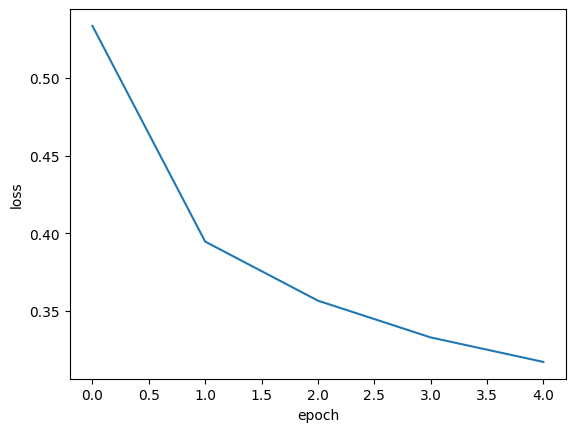

In [ ]:
# 에포크 별 손실 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

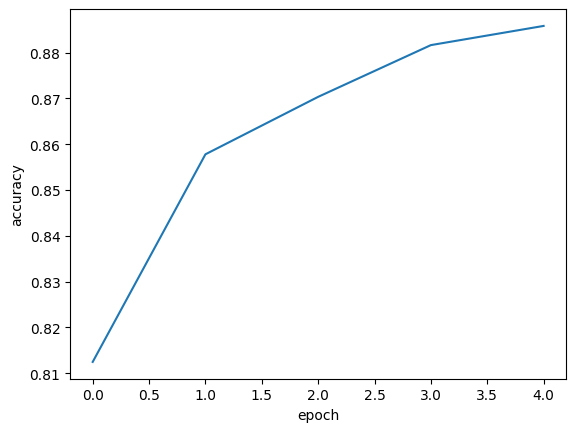

In [11]:
# 에포크 별 정확도 시각화
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

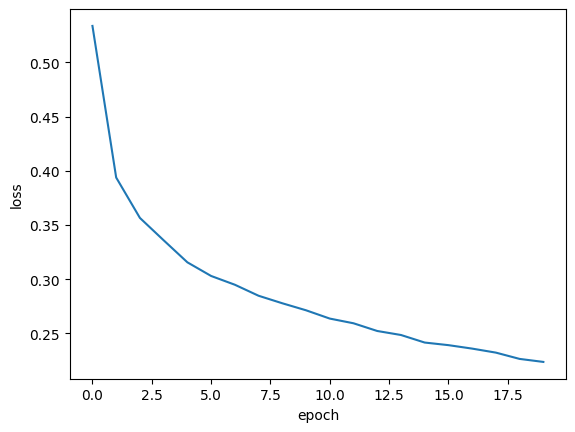

In [13]:
# epoch를 20으로 증가시켜 모델 훈련
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

- 과대/과소 적합 주의
- 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수
- 모델이 잘 훈련 되었는지 판단하려면 정확도보다 손실 함수의 값을 확인

In [14]:
# 에포크마다 검증 손실을 계산
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# history 출력
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


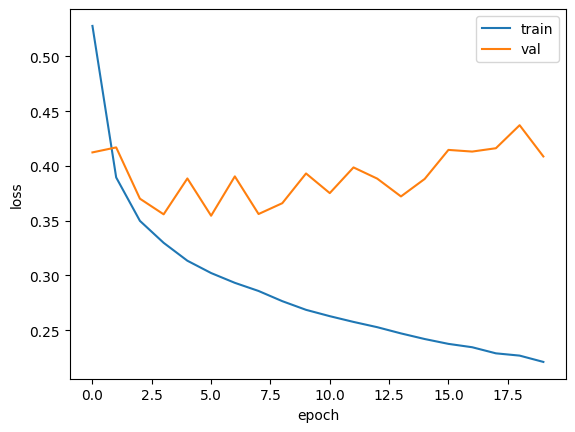

In [16]:
# 훈련과정 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


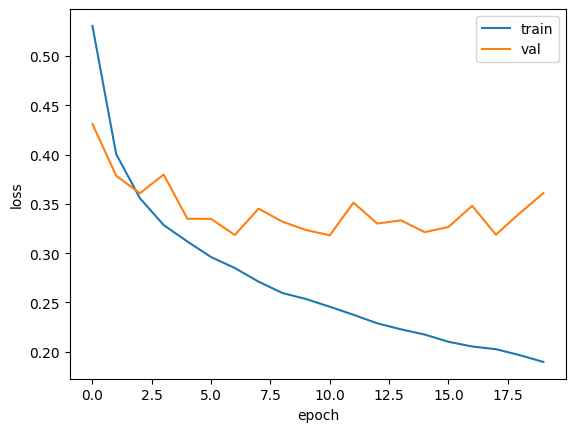

In [18]:
# 과대적합을 막기 위해 옵티마이저 적용
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃 - 훈련 과정에서 랜덤으로 층에 있는 일부 뉴런의 출력을 0으로 만들어 과대 적합 방지
### (모델 평과와 예측에는 자동으로 드롭아웃 적용x)

In [19]:
# 드롭아웃 객체 전달해 층을 추가
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

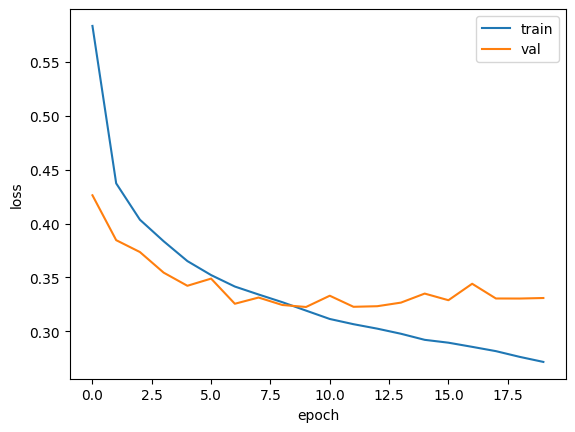

In [20]:
# 훈련 손실과 검증 손실 그래프 시각화
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원

In [24]:
# 에포크 횟수를 10으로 조정
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
# 모델 파라미터 저장
model.save_weights('model/model.weights.h5')

In [31]:
# 모델 저장
model.save('model/model-whole.h5')

In [ ]:
# 모델 파라미터 로드해 사용
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model/model.weights.h5')    # 저장했던 모델과 정확히 같은 구조를 가져야 load_weights() 메서드 사용가능

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 모델 정확도 계산
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)    # axis=-1: 배열의 마지막 차원을 따라 최댓값을 고름
print(np.mean(val_labels==val_target))  # evaluate() 메서드를 사용하기엔 compile() 메서드를 실행해야 하기 때문에 predict() 사용

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
0.8840833333333333


In [ ]:
# 모델 로드해 사용
model=keras.models.load_model('model/model-whole.h5')
model.evaluate(val_scaled, val_target)  # load_model()은 모델 파라미터 및 구조와 옵티마이저까지 모두 복원하기 때문에 evaluate() 사용가능

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.3249


[0.32535815238952637, 0.8840833306312561]

### 콜백 - 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

In [39]:
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델 저장
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('model/best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# 모델 로드
model=keras.models.load_model('model/best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8881 - loss: 0.3141


[0.3142990171909332, 0.8870000243186951]

In [ ]:
# 조기종료 콜백(과대적합이 시작되기 전에 훈련을 미리 종료) 사용
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('model/best-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)  # patience=2: 2번연속 검증 점수가 향상되지 않으면 훈련 중지
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# 조기종료 에포크 출력
print(early_stopping_cb.stopped_epoch)

11


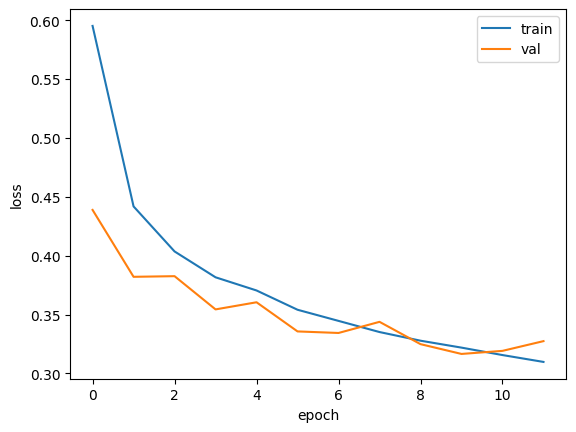

In [45]:
# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [46]:
# 조기종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
print(model.evaluate(val_scaled, val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.3165
[0.31655997037887573, 0.8843333125114441]
